# Analyzing DC Electrode Anharmonicities

## Import libraries
The utility functions be found in `anharm_analysis.utils`, with plotting and functions used to perform fitting and calculating the frequency shifts. Some useful functions that can be used by themselves without the general framework include: 
* `eval_spherical_harmonics(C, x, y, z)`: Evaluate the potential value at any (x, y, z) given a list of coefficients for respective spherical harmonics bases.
* `get_Cj_list(**kwargs)`: The the spherical harmonics coefficient list based on assigned term values. For example, `get_Cj_list(U2=1, C21=1)` will return a list with U2 and the 21st term with coefficient equal to 1 and everything else 0.
* `get_Cj_fit(V, x, y, z, order)`: Fit for an arbitrary potential *V* to the spherical harmonics basis of *order*, return the fitting coefficient.
* `compute_a(C0)`: Compute the coefficients a_i given C_i values. C0 is the fitting coefficients with arbitrary U2 values. Expression taken form Joshua Goldman's thesis.
* `find_freq_shift(A, a)`: Estimate the 1D frequency shift based on motional amplitude *A* and the *a* coefficients computed. Expression taken form Joshua Goldman's thesis.

Note that the spherical harmonics expansion is conducted using a Julia library `SphericalHarmonicExpansions.jl`, called in python through a package `juliacall`. When imported for the first time, Julia packages needed will be installed automatically and this can take some time.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from anharm_analysis.utils import big_plt_font
from anharm_analysis.Trap import COMSOLTrap

big_plt_font() # a specific set of plotting parameters for big font sizes and line width

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Load data

In [2]:
# The .csv file that contains simulation results.
file = 'output.csv' 

# A list of electrode names. In COMSOL simulation a parametric sweep 
# should be done with voltages of electrodes ei named as Vei. 
electrodes = ['e1', 'c1', 'r', 'c2', 'e2'] 

# A trap object to hold all the data. Unit should be set with appropriate
# strings, e.g. 'um' or 'mm'. L_ROI denotes the length of the cube defining 
# the Region Of Interest, with unit corresponding the unit variable. sim_unit 
# refers to the simulation unit used in COMSOL, with 1e-6 referring to um.
# The excitation prefix is needed to indicate that Vei is the voltage excitation 
# in COMSOL applied to electrode ei. sim_prefix is here as the potential 
# output header has a certain prefix. skiprows indicates the number of rows
# to skip when loading data from the csv file.
trap = COMSOLTrap(file, electrodes, unit='um', L_ROI=100, sim_unit=1e-6,
                  excitation_prefix='V', sim_prefix='esbe.', skiprows=8) 

# Find the DC voltage configuration and construct the resulting total potential.
# Higher-order terms can also be passed into it with syntax Cj = <value>.
trap.construct_V_total(C=0, Ey=0, Ez=0, Ex=0, U3=0, U4=0, U2=-1, U5=0, U1=0) 

# Perform the spherical harmonics expansion with specified order. 
trap.expand_spherical_harmonics(order=6)

## Evaluations

Plot the constructed potential using set DC voltages and the fitted potential using spherical harmonics expansions. The ROI coordinates can be obtained by `x, y, z = trap.ROI_grid.get_xyz_array()`. The constructed potential can be obtained through `trap.V_total`, and the fitted potential can be obtained from `trap.V_fit`.

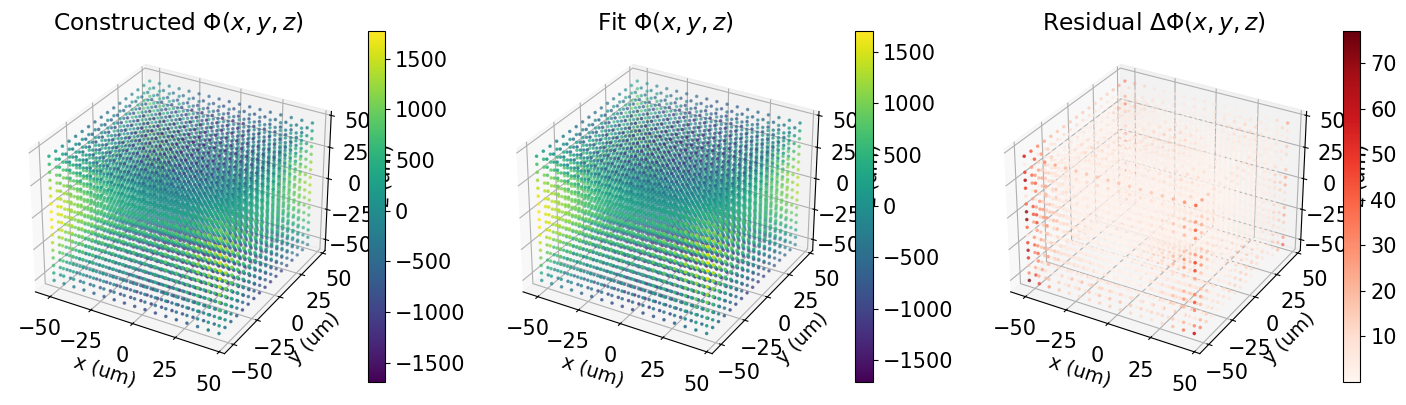

In [3]:
trap.plot_V_fit()

Plot the fitting coeffients. Note that here *Mj* and *Cj* are interchangeable names, although by convention *Mj* is typically used for spherical harmonics coefficients in Paul traps, while *Cj* is more often used in Penning traps. 

The fitting coefficient array can be obtained from `trap.Cj_fit`. If *logy* is set to True, the magnitude of coefficients will be plotted.

,C,Ey,Ez,Ex,U3,U4,U2,U5,U1,10,...,40,41,42,43,44,45,46,47,48,49
Mj,8.430e-01,7.206e-03,2.111e-02,7.206e-03,5.629e-05,2.969e-04,1.003e+00,2.967e-04,1.286e-08,1.343e-06,...,2.282e-13,1.517e-11,4.344e-11,3.051e-10,4.343e-11,1.226e-15,3.631e-14,2.172e-10,5.649e-12,2.860e-15


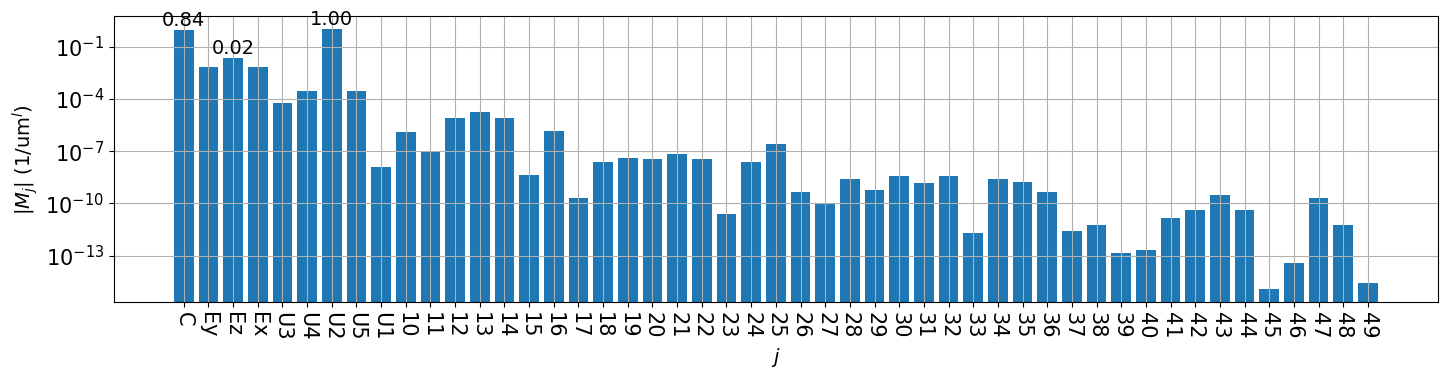

In [4]:
trap.plot_Mj(logy=True)

Plot the DC voltages required to achieve the coefficients set in the previous section. Note that the voltages here is huge due to the unit of U2 is in um.

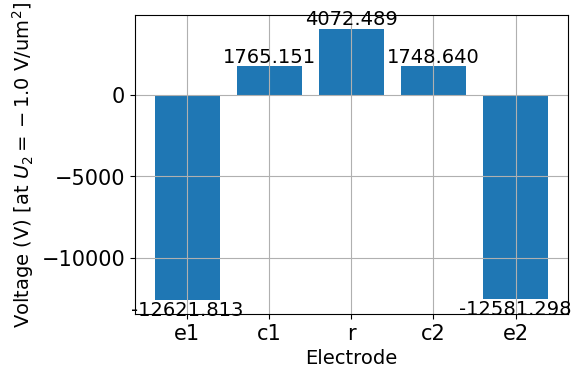

In [5]:
trap.plot_V_DC()

Plot the contours of the potential in all 3 planes.

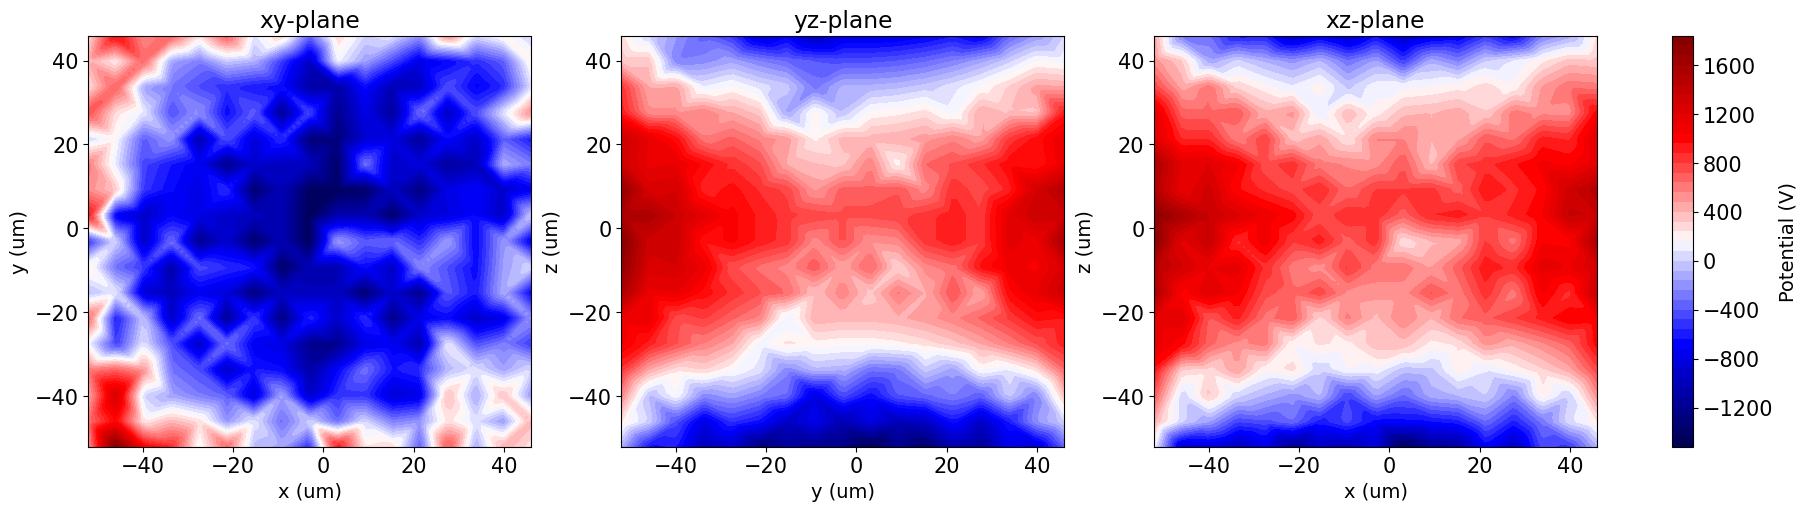

In [6]:
trap.plot_potential_contours()

Plot the 1D cutline  through the center and perform 2nd-order and 8th-order 1D polynomial fit. 

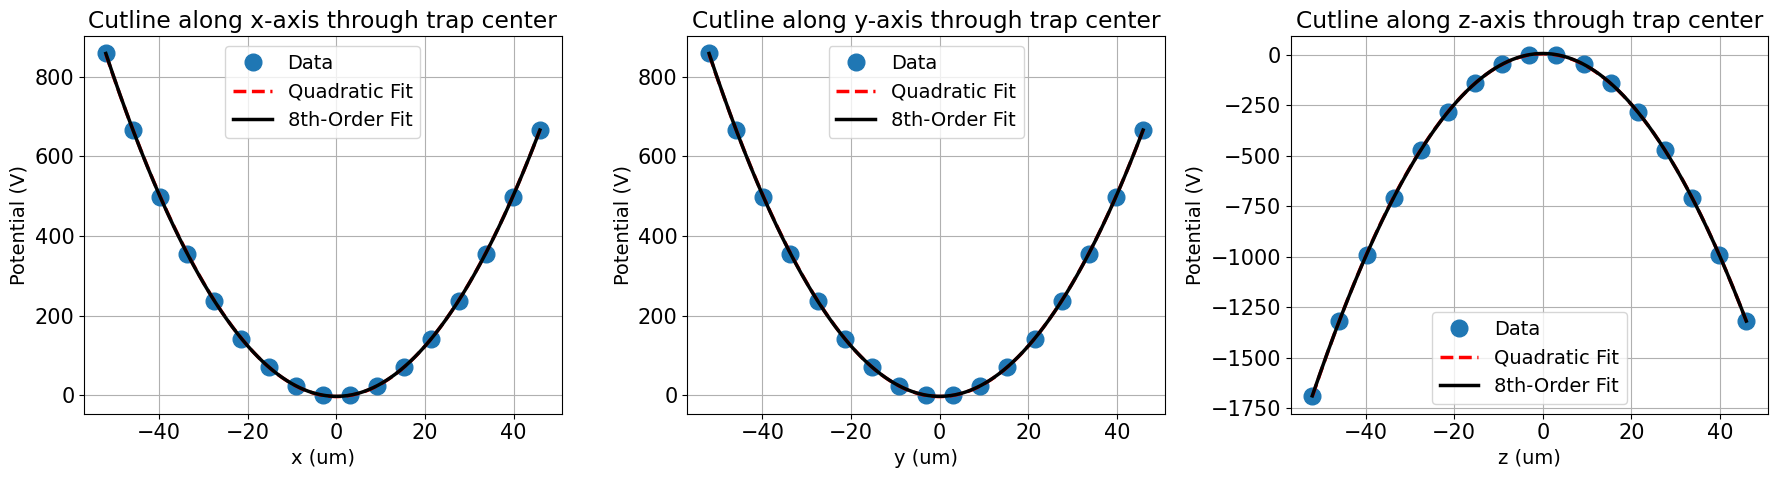

In [7]:
trap.plot_cutline_fits()

Estimate the frequency shifts in each direction using the polynomial fit results obtained above. The shift is found using analytical approximations shown in Joshua Goldman's thesis. See the fucntion `util.find_freq_shift(A, a)` for details.

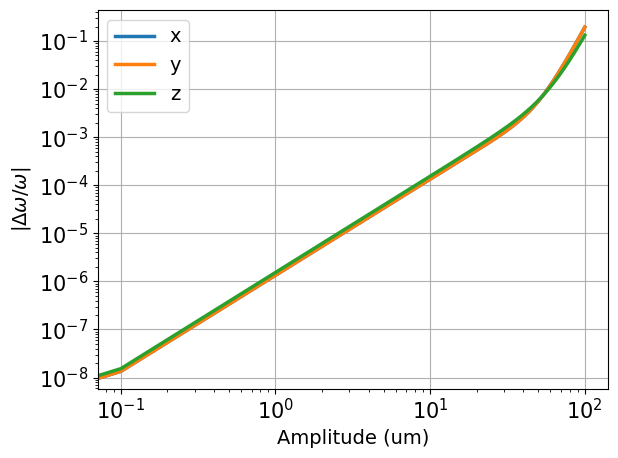

In [8]:
trap.plot_estimated_frequency_shift()